# Average Reward for different Learning Rates

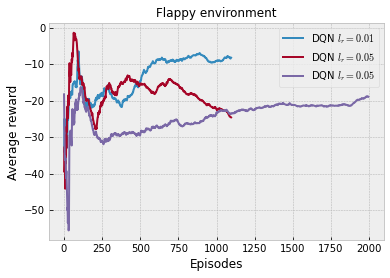

In [25]:
import seaborn as sns
from matplotlib import pyplot as plt
import yaml
import sys
import os
import numpy as np
import pandas as pd

# sns.set_theme(style="darkgrid")
image_format = 'jpg'
plt.style.use('bmh')

LOCAL_PATH=os.path.abspath('')

RESULT_PATH=LOCAL_PATH+'/TEMP/'

with open(r''+RESULT_PATH+'dql_biased_episodes.yaml') as parameters:
        temp = yaml.safe_load(parameters)
        #dql_biased=temp['avr_loss']
        #dql_biased_1=temp['avr_r']
        dql=temp['avr_r']
with open(r''+RESULT_PATH+'dql_two_layers_episodes.yaml') as parameters:
        temp = yaml.safe_load(parameters)
        #dql_biased=temp['avr_loss']
        #dql_biased_1=temp['avr_r']
        dql_2l=temp['avr_r']
with open(r''+RESULT_PATH+'dql_episodes.yaml') as parameters:
        temp = yaml.safe_load(parameters)
        #dql_biased=temp['avr_loss']
        #dql_biased_1=temp['avr_r']
        dql_l=temp['avg_r_nn']
fig, ax = plt.subplots()
ax.set_title("Flappy environment", fontsize=12, color = 'black')
ax.set_xlabel("Episodes")
ax.set_ylabel("Average reward")
ax.plot(dql[5:],label='DQN $l_{r}=0.01$')
ax.plot(dql_2l[5:],label='DQN $l_{r}=0.05$')
ax.plot(dql_l[5:],label='DQN $l_{r}=0.05$')
ax.legend()
#fig.savefig("flappy_DQN.jpg", format=image_format, dpi=400)

# Average Reward for Huber vs MSE

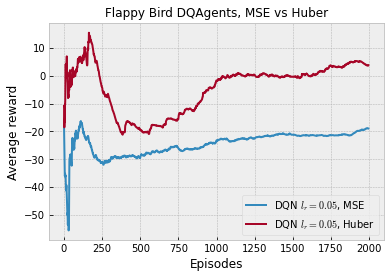

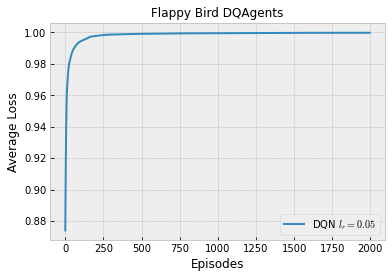

In [26]:
import seaborn as sns
from matplotlib import pyplot as plt
import yaml
import sys
import os
import numpy as np
import pandas as pd

# sns.set_theme(style="darkgrid")
image_format = 'jpg'
plt.style.use('bmh')

LOCAL_PATH=os.path.abspath('')

RESULT_PATH=LOCAL_PATH+'/TEMP/'
RESULT_PATH2=LOCAL_PATH+'/TEMP2/'

with open(r''+RESULT_PATH+'dql_biased_episodes.yaml') as parameters:
        temp = yaml.safe_load(parameters)
        dql_biased=temp['avr_loss']
        #dql_biased_1=temp['avr_r']
        dql=temp['avr_r']
with open(r''+RESULT_PATH+'dql_two_layers_episodes.yaml') as parameters:
        temp = yaml.safe_load(parameters)
        dql_biased_2l=temp['avr_loss']
        #dql_biased_1=temp['avr_r']
        dql_2l=temp['avr_r']
with open(r''+RESULT_PATH+'dql_episodes.yaml') as parameters:
        temp = yaml.safe_load(parameters)
        dql_biased_l=temp['avr_loss']
        dql_biased_1=temp['avr_r']
        dql_l=temp['avg_r_nn']

with open(r''+RESULT_PATH2+'dql_episodes.yaml') as parameters:
        temp = yaml.safe_load(parameters)
        dql_biased_l_loss=temp['avr_loss']
        dql_biased_1_good_loss=temp['avr_r']
        dql_l_good_loss=temp['avg_r_nn']
fig, ax = plt.subplots()
ax.set_title("Flappy Bird DQAgents, MSE vs Huber", fontsize=12, color = 'black')
ax.set_xlabel("Episodes")
ax.set_ylabel("Average reward")
# ax.plot(dql[5:],label='DQN $l_{r}=0.01$')
# ax.plot(dql_2l[5:],label='DQN $l_{r}=0.05$')
ax.plot(dql_l[5:],label='DQN $l_{r}=0.05$, MSE')
ax.plot(dql_l_good_loss[5:],label='DQN $l_{r}=0.05$, Huber')
ax.legend()
# fig.savefig("flappy_DQN_lossbattle.png", format='png', dpi=400)

fig, ax = plt.subplots()
ax.set_title("Flappy Bird DQAgents", fontsize=12, color = 'black')
ax.set_xlabel("Episodes")
ax.set_ylabel("Average Loss")
# ax.plot(dql_biased[5:],label='DQN $l_{r}=0.01$')
# ax.plot(dql_biased_2l[5:],label='DQN $l_{r}=0.05$')
ax.plot(dql_biased_l_loss[5:],label='DQN $l_{r}=0.05$')
ax.legend()
# fig.savefig("flappyLoss.png", format='png')


# Demo of various Models

In [5]:
import os
import numpy as np
import time
import flappy_bird_gym
import tensorflow as tf
import pygame

LOCAL_PATH=os.path.abspath('')
MAIN_PATH=LOCAL_PATH+''

print(LOCAL_PATH)

ENV_PATH=MAIN_PATH+"/LIB/GAME"
LIB_PATH=MAIN_PATH+"/LIB"
BIN_PATH=MAIN_PATH+"/POLICIES"
TRN_PATH=MAIN_PATH+"/LIB/TRAINING"


def run_demo(model_name):
    scorelist = []
    env = flappy_bird_gym.make("FlappyBird-v0",pipe_gap = 160)
    main=tf.keras.models.load_model(BIN_PATH+"/"+model_name)
    pygame.init()
    for i in range(0,100):
        s = env.reset()
        while True:
            for event in pygame.event.get():
                    if event.type == pygame.QUIT:
                        pygame.quit()
            s=tf.convert_to_tensor([s.flatten()],dtype=tf.float32)
            action=np.argmax(main(s))
            s_, reward, done, info = env.step(action)
            # env.render() Uncomment to Watch the runs
            # time.sleep(1 / 120)  # FPS
            s=s_
            if done:
                break
        scorelist.append(info['score'])
    env.close()
    return scorelist

if __name__ == "__main__":
    print("Demo FlappyBirds environment with DQL")
    # Uncomment Model Name Definition to run the chosen one

    ##########################
    ### Learning Rate 0.01 ###
    ##########################
    # model_name='dql_biased_episodes'
    # pygame.display.set_caption("lr=0.01 1100 episodes")


    ########################################
    ### Learning Rate 0.05 1100 Episodes ###
    ########################################
    # model_name='dql_two_layers_episodes'
    # pygame.display.set_caption("lr=0.05 1100 episodes")


    #####################################
    ###Larning rate=0.05 2000 episodes###
    #####################################
    model_name='dql_episodes'
    pygame.display.set_caption("lr=0.05 2000 episodes")
    print(run_demo(model_name))
    print(sum(run_demo(model_name))/len(run_demo(model_name)))

/home/reda/Documents/School/Year 3/CM3203 Individual Project/FlappyCopterV1_3/FlappyCopterV1_0
Demo FlappyBirds environment with DQL
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0.0


# Average and max scores for each run

In [13]:
scorelist_005 = [21, 87, 3, 167, 14, 0, 12, 201, 12, 61, 84, 45, 53, 143, 11, 9, 47, 12, 19, 5, 30, 20, 75, 123, 0, 96, 9, 104, 0, 53, 56, 176, 24, 0, 25, 49, 0, 0, 30, 18, 3, 8, 16, 77, 77, 39, 6, 13, 0, 39, 0, 12, 33, 33, 19, 0, 17, 40, 15, 64, 5, 7, 12, 20, 38, 27, 31, 0, 1, 0, 20, 10, 12, 26, 11, 94, 0, 15, 20, 105, 75, 28, 148, 25, 58, 13, 0, 13, 10, 0, 0, 49, 0, 0, 0, 51, 0, 43, 4, 0]
avg_005 = sum(scorelist_005)/len(scorelist_005)
print(avg_005)
print(max(scorelist_005))

scorelist_001 = [2, 4, 7, 3, 3, 5, 20, 7, 5, 7, 3, 10, 3, 5, 12, 3, 10, 6, 4, 5, 5, 2, 1, 5, 5, 2, 12, 10, 2, 7, 5, 8, 6, 12, 2, 8, 3, 4, 3, 4, 3, 8, 9, 9, 2, 3, 22, 2, 5, 8, 9, 14, 7, 2, 2, 7, 5, 3, 3, 5, 6, 4, 2, 18, 13, 5, 12, 4, 2, 3, 7, 11, 9, 3, 4, 3, 7, 10, 4, 10, 8, 5, 2, 3, 4, 3, 2, 19, 9, 2, 15, 2, 5, 2, 3, 5, 3, 3, 4, 8]
avg_001 = sum(scorelist_001)/len(scorelist_001)
print(avg_001)
print(max(scorelist_001))

scorelist_005_1100 = [8, 12, 3, 14, 12, 5, 16, 7, 8, 11, 8, 16, 10, 4, 9, 14, 9, 10, 25, 4, 6, 5, 10, 22, 4, 12, 6, 6, 10, 22, 23, 6, 4, 15, 10, 4, 2, 21, 18, 19, 11, 2, 4, 7, 11, 4, 3, 11, 13, 15, 12, 14, 12, 11, 2, 5, 6, 8, 17, 16, 24, 5, 8, 6, 16, 5, 8, 20, 6, 11, 24, 12, 7, 5, 44, 5, 9, 12, 9, 15, 11, 7, 8, 3, 12, 21, 13, 11, 6, 2, 8, 10, 4, 23, 5, 4, 5, 31, 5, 9]
avg_005_1100 = sum(scorelist_005_1100)/len(scorelist_005_1100)
print(avg_005_1100)
print(max(scorelist_005_1100))

33.76
201
6.02
22
10.63
44
